![Nuclio logo](https://nuclio.school/wp-content/uploads/2018/12/nucleoDS-newBlack.png)

# **MASTER DATA SCIENCE:** Nuclio
# **INTEGRANTES DEL GRUPO:** Hector Maninatt, Jose Bau, Pablo Guimerà, Simone Solieri, Victor Barria
# **Tutora:** Raquel Revilla
# **DSMarket - Parte 1:** Tables Join


# **00 Importación de datos y librerías**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stat
import datetime as dt

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 54.8 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
calendar = pd.read_csv('/content/drive/MyDrive/Master_Data_Science/TFM/Dataset_DSMarket/daily_calendar_with_events.csv')
prices = pd.read_csv('/content/drive/MyDrive/Master_Data_Science/TFM/Dataset_DSMarket/item_prices.csv')
sales = pd.read_csv('/content/drive/MyDrive/Master_Data_Science/TFM/Dataset_DSMarket/item_sales.csv')

# **01 - Exploración inicial y table join**

## 01.1 - Calendar

In [ ]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1913 entries, 0 to 1912
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         1913 non-null   object
 1   weekday      1913 non-null   object
 2   weekday_int  1913 non-null   int64 
 3   d            1913 non-null   object
 4   event        26 non-null     object
dtypes: int64(1), object(4)
memory usage: 74.9+ KB


In [ ]:
calendar.isnull().sum()

date              0
weekday           0
weekday_int       0
d                 0
event          1887
dtype: int64

In [ ]:
prices.groupby('item')['sell_price'].unique()

item
ACCESORIES_1_001     [12.7414, 10.9858, 11.145400000000002, 6.65, 1...
ACCESORIES_1_002                     [5.280100000000001, 2.66, 3.9501]
ACCESORIES_1_003                      [3.9501, 1.2901, 7.9401, 1.2502]
ACCESORIES_1_004                      [5.7722, 6.1712, 5.0141, 5.6658]
ACCESORIES_1_005     [3.9634, 3.2984, 4.0964, 3.8304, 3.6309, 1.995...
                                           ...                        
SUPERMARKET_3_823    [3.216, 3.0, 3.456, 2.976, 3.576, 2.4, 1.188, ...
SUPERMARKET_3_824             [2.964, 2.976, 3.216, 2.4, 2.856, 2.616]
SUPERMARKET_3_825    [4.8, 5.255999999999999, 4.776, 3.708, 2.4, 4....
SUPERMARKET_3_826                                         [1.536, 1.2]
SUPERMARKET_3_827                                           [1.2, 0.6]
Name: sell_price, Length: 3049, dtype: object

In [ ]:
calendar.head(5)

,date,weekday,weekday_int,d,event
0,2011-01-29,Saturday,1,d_1,NaN
1,2011-01-30,Sunday,2,d_2,NaN
2,2011-01-31,Monday,3,d_3,NaN
3,2011-02-01,Tuesday,4,d_4,NaN
4,2011-02-02,Wednesday,5,d_5,NaN


In [ ]:
calendar.tail()

,date,weekday,weekday_int,d,event
1908,2016-04-20,Wednesday,5,d_1909,NaN
1909,2016-04-21,Thursday,6,d_1910,NaN
1910,2016-04-22,Friday,7,d_1911,NaN
1911,2016-04-23,Saturday,1,d_1912,NaN
1912,2016-04-24,Sunday,2,d_1913,NaN


In [ ]:
calendar.duplicated().sum()

0

In [ ]:
calendar['event'].value_counts()

event
SuperBowl         6
Ramadan starts    5
Thanksgiving      5
NewYear           5
Easter            5
Name: count, dtype: int64

## 01.2 - Prices

In [ ]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965706 entries, 0 to 6965705
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   item        object 
 1   category    object 
 2   store_code  object 
 3   yearweek    float64
 4   sell_price  float64
dtypes: float64(2), object(3)
memory usage: 265.7+ MB


In [ ]:
prices.isnull().sum()

item               0
category           0
store_code         0
yearweek      243920
sell_price         0
dtype: int64

In [ ]:
prices.head()

,item,category,store_code,yearweek,sell_price
0,ACCESORIES_1_001,ACCESORIES,NYC_1,201328.0,12.7414
1,ACCESORIES_1_001,ACCESORIES,NYC_1,201329.0,12.7414
2,ACCESORIES_1_001,ACCESORIES,NYC_1,201330.0,10.9858
3,ACCESORIES_1_001,ACCESORIES,NYC_1,201331.0,10.9858
4,ACCESORIES_1_001,ACCESORIES,NYC_1,201332.0,10.9858


In [ ]:
prices.duplicated().sum()

212120

In [ ]:
prices[(prices.duplicated())&(prices['yearweek'].notnull())]

,item,category,store_code,yearweek,sell_price


In [ ]:
prices[prices['yearweek'].isnull()]['item'].nunique()

3049

Todos los productos tienen almenos un valor en yearweek nulo; haremos un estudio en profundidad más adelante.

array([[<Axes: title={'center': 'yearweek'}>]], dtype=object)

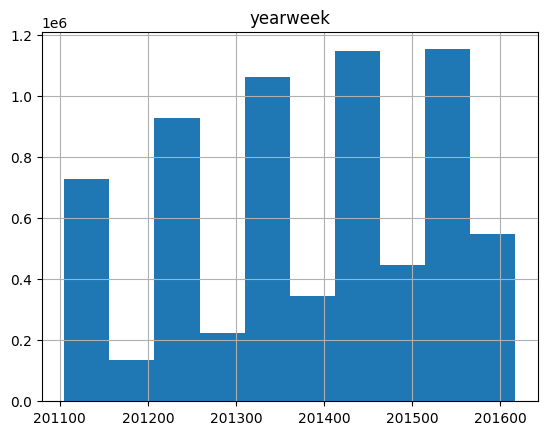

In [ ]:
prices.hist('yearweek')

In [ ]:
prices['yearweek'].describe()

count    6.721786e+06
mean     2.013824e+05
std      1.450189e+02
min      2.011050e+05
25%      2.012480e+05
50%      2.014100e+05
75%      2.015150e+05
max      2.016170e+05
Name: yearweek, dtype: float64

In [ ]:
prices['store_code'].value_counts()

store_code
BOS_2    713960
BOS_1    712527
NYC_1    711073
PHI_3    708747
NYC_3    706585
BOS_3    703682
NYC_4    691375
PHI_2    690546
PHI_1    678209
NYC_2    649002
Name: count, dtype: int64

In [ ]:
prices.nunique()

item          3049
category         3
store_code      10
yearweek       279
sell_price    1892
dtype: int64

## 01.3 - Sales

In [ ]:
sales.head()

,id,item,category,department,store,store_code,region,d_1,d_2,d_3,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,ACCESORIES_1_004_NYC_1,ACCESORIES_1_004,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,ACCESORIES_1_005_NYC_1,ACCESORIES_1_005,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1920 entries, id to d_1913
dtypes: int64(1913), object(7)
memory usage: 446.6+ MB


In [ ]:
sales.duplicated().sum()

0

In [ ]:
sales.isnull().sum().sum()

0

## 01.4 - Agregar informaciones y crear nuevas variables

El objetivo ahora es agregar las informaciones de las tres tablas en una unica tabla y entender mejor que representan los nulos en yearweek. La hipotesis es que si la yearweek no está presente es porqué en esa semana el producto en el dado store no se vendió.

In [ ]:
calendar.head(3)

,date,weekday,weekday_int,d,event
0,2011-01-29,Saturday,1,d_1,NaN
1,2011-01-30,Sunday,2,d_2,NaN
2,2011-01-31,Monday,3,d_3,NaN


In [ ]:
prices.head(3)

,item,category,store_code,yearweek,sell_price
0,ACCESORIES_1_001,ACCESORIES,NYC_1,201328.0,12.7414
1,ACCESORIES_1_001,ACCESORIES,NYC_1,201329.0,12.7414
2,ACCESORIES_1_001,ACCESORIES,NYC_1,201330.0,10.9858


In [ ]:
sales.head(3)

,id,item,category,department,store,store_code,region,d_1,d_2,d_3,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,2,1,2,1,1,1,0,1,1,1


### 01.4.1 - Calendar/Sales Merge

Eliminemos la columna weekday_int porqué no añade información útil

In [ ]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1913 entries, 0 to 1912
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     1913 non-null   object
 1   weekday  1913 non-null   object
 2   d        1913 non-null   object
 3   event    26 non-null     object
dtypes: object(4)
memory usage: 59.9+ KB


Nos piden:
1. Productos más vendidos y menos vendidos por cada ciudad.
2. Varian también de una tienda a otra de la misma ciudad?
3. Si las modas varian de una tienda a otra, hay diferencia de precios en las tiendas de la misma ciudad?
4. Varian las modas col periodo de l'año?

**Transformo** el dataframe de sales en **formato long** con pd.melt()

In [ ]:
sales_columns = sales.columns[0:7].to_list()

In [ ]:
sales_columns

['id', 'item', 'category', 'department', 'store', 'store_code', 'region']

In [ ]:
sales_long = pd.melt(sales,id_vars=sales_columns,var_name='d',value_name='daily_sales')

In [ ]:
sales_long

,id,item,category,department,store,store_code,region,d,daily_sales
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0
1,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0
2,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0
3,ACCESORIES_1_004_NYC_1,ACCESORIES_1_004,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0
4,ACCESORIES_1_005_NYC_1,ACCESORIES_1_005,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0
...,...,...,...,...,...,...,...,...,...
58327365,SUPERMARKET_3_823_PHI_3,SUPERMARKET_3_823,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,d_1913,1
58327366,SUPERMARKET_3_824_PHI_3,SUPERMARKET_3_824,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,d_1913,0
58327367,SUPERMARKET_3_825_PHI_3,SUPERMARKET_3_825,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,d_1913,0
58327368,SUPERMARKET_3_826_PHI_3,SUPERMARKET_3_826,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,d_1913,3


In [ ]:
sales_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58327370 entries, 0 to 58327369
Data columns (total 9 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   id           object
 1   item         object
 2   category     object
 3   department   object
 4   store        object
 5   store_code   object
 6   region       object
 7   d            object
 8   daily_sales  int64 
dtypes: int64(1), object(8)
memory usage: 3.9+ GB


In [ ]:
calendar.head()

,date,weekday,d,event
0,2011-01-29,Saturday,d_1,NaN
1,2011-01-30,Sunday,d_2,NaN
2,2011-01-31,Monday,d_3,NaN
3,2011-02-01,Tuesday,d_4,NaN
4,2011-02-02,Wednesday,d_5,NaN


Extraemos otras variables utiles de la columna date

In [ ]:
calendar['date'] = calendar['date'].map(lambda x: pd.Timestamp(x))
calendar['year'] = calendar['date'].map(lambda x: x.year)
calendar['month'] = calendar['date'].map(lambda x: x.month)
calendar['day'] = calendar['date'].map(lambda x: x.day)

In [ ]:
calendar.head()

,date,weekday,weekday_int,d,event,year,month,day
0,2011-01-29,Saturday,1,d_1,NaN,2011,1,29
1,2011-01-30,Sunday,2,d_2,NaN,2011,1,30
2,2011-01-31,Monday,3,d_3,NaN,2011,1,31
3,2011-02-01,Tuesday,4,d_4,NaN,2011,2,1
4,2011-02-02,Wednesday,5,d_5,NaN,2011,2,2


In [ ]:
calendar.query('week==53')

,weekday,d,event,year,week,month,day
1794,Monday,d_1795,NaN,2015,53,12,28
1795,Tuesday,d_1796,NaN,2015,53,12,29
1796,Wednesday,d_1797,NaN,2015,53,12,30
1797,Thursday,d_1798,NaN,2015,53,12,31
1798,Friday,d_1799,NewYear,2016,53,1,1
1799,Saturday,d_1800,NaN,2016,53,1,2
1800,Sunday,d_1801,NaN,2016,53,1,3


In [ ]:
calendar.describe()

,year,week,month,day
count,1913.000000,1913.000000,1913.000000,1913.000000
mean,2013.209096,25.870883,6.357554,15.703084
std,1.532487,15.128997,3.459678,8.795781
min,2011.000000,1.000000,1.000000,1.000000
25%,2012.000000,13.000000,3.000000,8.000000
50%,2013.000000,25.000000,6.000000,16.000000
75%,2015.000000,39.000000,9.000000,23.000000
max,2016.000000,53.000000,12.000000,31.000000


In [ ]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1913 entries, 0 to 1912
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   weekday  1913 non-null   object
 1   d        1913 non-null   object
 2   event    26 non-null     object
 3   year     1913 non-null   int64 
 4   week     1913 non-null   int64 
 5   month    1913 non-null   int64 
 6   day      1913 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 104.7+ KB


In [ ]:
calendar.nunique()

weekday       7
d          1913
event         5
year          6
week         53
month        12
day          31
dtype: int64

In [ ]:
sales_long['d'].nunique()

1913

### Estudio de la logica de yearweek

In [ ]:
prices.describe()

,yearweek,sell_price
count,6.721786e+06,6.965706e+06
mean,2.013824e+05,5.518273e+00
std,1.450189e+02,4.387861e+00
min,2.011050e+05,1.200000e-02
25%,2.012480e+05,2.620100e+00
50%,2.014100e+05,4.200000e+00
75%,2.015150e+05,7.176000e+00
max,2.016170e+05,1.341500e+02


In [ ]:
pd.set_option('display.max_rows',None)

In [ ]:
prices.head()

,item,category,store_code,yearweek,sell_price
0,ACCESORIES_1_001,ACCESORIES,NYC_1,201328.0,12.7414
1,ACCESORIES_1_001,ACCESORIES,NYC_1,201329.0,12.7414
2,ACCESORIES_1_001,ACCESORIES,NYC_1,201330.0,10.9858
3,ACCESORIES_1_001,ACCESORIES,NYC_1,201331.0,10.9858
4,ACCESORIES_1_001,ACCESORIES,NYC_1,201332.0,10.9858


In [ ]:
prices.nunique()

item          3049
category         3
store_code      10
yearweek       279
sell_price    1892
dtype: int64

In [ ]:
calendar.head()

,date,weekday,weekday_int,d,event,year,week,month,day
0,2011-01-29,Saturday,1,d_1,NaN,2011,4,1,29
1,2011-01-30,Sunday,2,d_2,NaN,2011,4,1,30
2,2011-01-31,Monday,3,d_3,NaN,2011,5,1,31
3,2011-02-01,Tuesday,4,d_4,NaN,2011,5,2,1
4,2011-02-02,Wednesday,5,d_5,NaN,2011,5,2,2


In [ ]:
calendar.tail()

,date,weekday,weekday_int,d,event,year,week,month,day
1908,2016-04-20,Wednesday,5,d_1909,NaN,2016,16,4,20
1909,2016-04-21,Thursday,6,d_1910,NaN,2016,16,4,21
1910,2016-04-22,Friday,7,d_1911,NaN,2016,16,4,22
1911,2016-04-23,Saturday,1,d_1912,NaN,2016,16,4,23
1912,2016-04-24,Sunday,2,d_1913,NaN,2016,16,4,24


In [ ]:
(len(calendar)-2)/7

273.0

In [ ]:
prices['yearweek'].nunique()

279

In [ ]:
prices['yearweek'].unique()

array([201328., 201329., 201330., 201331., 201332., 201333., 201334.,
       201335., 201336., 201337., 201338., 201339., 201340., 201341.,
       201342., 201343., 201344., 201345., 201346., 201347., 201348.,
       201349., 201350., 201351., 201352., 201400., 201401., 201402.,
       201403., 201404., 201405., 201406., 201407., 201408., 201409.,
       201410., 201411., 201412., 201413., 201414., 201415., 201416.,
       201417., 201418., 201419., 201420., 201421., 201422., 201423.,
       201424., 201425., 201426., 201427., 201428., 201429., 201430.,
       201431., 201432., 201433., 201434., 201435., 201436., 201437.,
       201438., 201439., 201440., 201441., 201442., 201443., 201444.,
       201445., 201446., 201447., 201448., 201449., 201450., 201451.,
       201452., 201500., 201501., 201502., 201503., 201504., 201505.,
       201506., 201507., 201508., 201509., 201510., 201511., 201512.,
       201513., 201514., 201515., 201516., 201517., 201518., 201519.,
       201520., 2015

In [ ]:
prices.groupby(['item','store_code']).get_group(('SUPERMARKET_2_086','PHI_2'))

,item,category,store_code,yearweek,sell_price
6008711,SUPERMARKET_2_086,SUPERMARKET,PHI_2,201219.0,2.964
6008712,SUPERMARKET_2_086,SUPERMARKET,PHI_2,201220.0,2.964
6008713,SUPERMARKET_2_086,SUPERMARKET,PHI_2,201221.0,2.964
6008714,SUPERMARKET_2_086,SUPERMARKET,PHI_2,201222.0,2.964
6008715,SUPERMARKET_2_086,SUPERMARKET,PHI_2,201223.0,2.964
6008716,SUPERMARKET_2_086,SUPERMARKET,PHI_2,201224.0,2.964
6008717,SUPERMARKET_2_086,SUPERMARKET,PHI_2,201225.0,2.964
6008718,SUPERMARKET_2_086,SUPERMARKET,PHI_2,201226.0,2.964
6008719,SUPERMARKET_2_086,SUPERMARKET,PHI_2,201227.0,2.964
6008720,SUPERMARKET_2_086,SUPERMARKET,PHI_2,201228.0,2.964


In [ ]:
prices.groupby(['item','store_code']).get_group(('SUPERMARKET_2_086','PHI_2'))

In [ ]:
prices.groupby('item')['sell_price'].nunique()!=2

item
ACCESORIES_1_001        True
ACCESORIES_1_002        True
ACCESORIES_1_003        True
ACCESORIES_1_004        True
ACCESORIES_1_005        True
ACCESORIES_1_006        True
ACCESORIES_1_007        True
ACCESORIES_1_008        True
ACCESORIES_1_009        True
ACCESORIES_1_010        True
ACCESORIES_1_011        True
ACCESORIES_1_012        True
ACCESORIES_1_013        True
ACCESORIES_1_014       False
ACCESORIES_1_015        True
ACCESORIES_1_016        True
ACCESORIES_1_017        True
ACCESORIES_1_018        True
ACCESORIES_1_019        True
ACCESORIES_1_020        True
ACCESORIES_1_021        True
ACCESORIES_1_022        True
ACCESORIES_1_023        True
ACCESORIES_1_024        True
ACCESORIES_1_025        True
ACCESORIES_1_026        True
ACCESORIES_1_027        True
ACCESORIES_1_028        True
ACCESORIES_1_029        True
ACCESORIES_1_030        True
ACCESORIES_1_031        True
ACCESORIES_1_032        True
ACCESORIES_1_033        True
ACCESORIES_1_034        True
ACCESORIE

In [ ]:
prices[(prices['yearweek']==201105)].shape

(10932, 5)

In [ ]:
calendar.tail()

,date,weekday,weekday_int,d,event,year,week,month,day
1908,2016-04-20,Wednesday,5,d_1909,NaN,2016,16,4,20
1909,2016-04-21,Thursday,6,d_1910,NaN,2016,16,4,21
1910,2016-04-22,Friday,7,d_1911,NaN,2016,16,4,22
1911,2016-04-23,Saturday,1,d_1912,NaN,2016,16,4,23
1912,2016-04-24,Sunday,2,d_1913,NaN,2016,16,4,24


Quiero juntar las tablas sales, calendar y prices. Por eso necesito que en calendar haya una columna yearweek coherente con la misma columna en prices.
La hipotesis es que en ds market la semana empieze el sabado y termine el viernes, y que los valores de yearweek del tipo AAAA00 (ejemplo:201400) sa han añadido por necesidad aritmetica o de altro tipo durante la creacion de la variable, sin tener realmente un significado practico. Eso se nota porqué en prices hay mas semanas que las semanas que hay en calendar.

Se nota que probablemente los valores de yearweek del tipo AAAA00 han sido generados copiando el precio de venta de la ultima semana del año anterior. Lo muestro a continuacion.

### Demuestracion de que se pueden quitar los años AAAA00

In [ ]:
yearweek_list_52_00 = [201253.0,201300.0]
for year in range(2011,2016):
  if year==2012:
    continue
  yearweek_list_52_00.append(float(str(year)+'52'))
  yearweek_list_52_00.append(float(str(year+1)+'00'))

In [ ]:
yearweek_list_52_00

[201253.0,
 201300.0,
 201152.0,
 201200.0,
 201352.0,
 201400.0,
 201452.0,
 201500.0,
 201552.0,
 201600.0]

In [ ]:
yearweek_list_00_01= []
for year in range(2011,2017):
  for week in ['00','01']:
    yearweek_list_00_01.append(float(str(year)+week))

In [ ]:
yearweek_list_00_01

[201100.0,
 201101.0,
 201200.0,
 201201.0,
 201300.0,
 201301.0,
 201400.0,
 201401.0,
 201500.0,
 201501.0,
 201600.0,
 201601.0]

In [ ]:
prices_not_null=prices[prices['yearweek'].notnull()].copy()

In [ ]:
prices_not_null['year']=prices_not_null['yearweek'].map(lambda x:int(str(x)[0:4]))

In [ ]:
prices_not_null.head()

,item,category,store_code,yearweek,sell_price,year
0,ACCESORIES_1_001,ACCESORIES,NYC_1,201328.0,12.7414,2013
1,ACCESORIES_1_001,ACCESORIES,NYC_1,201329.0,12.7414,2013
2,ACCESORIES_1_001,ACCESORIES,NYC_1,201330.0,10.9858,2013
3,ACCESORIES_1_001,ACCESORIES,NYC_1,201331.0,10.9858,2013
4,ACCESORIES_1_001,ACCESORIES,NYC_1,201332.0,10.9858,2013


In [ ]:
prices_not_null.duplicated().sum()

0

In [ ]:
prices_not_null[(prices_not_null['item']=='SUPERMARKET_3_823')&(prices_not_null['store_code']=='BOS_2')&(prices_not_null['year'].isin([2014,2015]))]

,item,category,store_code,yearweek,sell_price,year
4183531,SUPERMARKET_3_823,SUPERMARKET,BOS_2,201400.0,3.000,2014
4183532,SUPERMARKET_3_823,SUPERMARKET,BOS_2,201401.0,3.000,2014
4183533,SUPERMARKET_3_823,SUPERMARKET,BOS_2,201402.0,3.000,2014
4183534,SUPERMARKET_3_823,SUPERMARKET,BOS_2,201403.0,3.000,2014
4183535,SUPERMARKET_3_823,SUPERMARKET,BOS_2,201404.0,3.000,2014
4183536,SUPERMARKET_3_823,SUPERMARKET,BOS_2,201405.0,3.456,2014
4183537,SUPERMARKET_3_823,SUPERMARKET,BOS_2,201406.0,3.456,2014
4183538,SUPERMARKET_3_823,SUPERMARKET,BOS_2,201407.0,3.456,2014
4183539,SUPERMARKET_3_823,SUPERMARKET,BOS_2,201408.0,3.456,2014
4183540,SUPERMARKET_3_823,SUPERMARKET,BOS_2,201409.0,3.456,2014


In [ ]:
(prices_not_null[prices_not_null['yearweek'].isin(yearweek_list_00_01)].groupby(['item','store_code','year'])['sell_price'].nunique()!=1).any()

True

Defino una tabla **year_change_price** donde por cada item y store hay solo los precios de las ultima y primeras semanas de cada año.

In [ ]:
year_change_price = prices_not_null[prices_not_null['yearweek'].isin(yearweek_list_52_00)].copy()

In [ ]:
year_change_price.head()

,item,category,store_code,yearweek,sell_price,year
24,ACCESORIES_1_001,ACCESORIES,NYC_1,201352.0,10.9858,2013
25,ACCESORIES_1_001,ACCESORIES,NYC_1,201400.0,10.9858,2014
77,ACCESORIES_1_001,ACCESORIES,NYC_1,201452.0,10.9858,2014
78,ACCESORIES_1_001,ACCESORIES,NYC_1,201500.0,10.9858,2015
130,ACCESORIES_1_001,ACCESORIES,NYC_1,201552.0,10.9858,2015


In [ ]:
def get_years_changing_col(yearweek):
  year = int(str(yearweek)[0:4])
  week = int(str(yearweek)[4:6])
  if week in [52,53]:
    old_year = year
    new_year = year+1
  else:
    old_year = year-1
    new_year = year
  return str(old_year)+'-'+str(new_year)

In [ ]:
get_years_changing_col(201253)

'2012-2013'

In [ ]:
year_change_price['years_changing']=year_change_price['yearweek'].map(get_years_changing_col)

In [ ]:
len(year_change_price)

249170

In [ ]:
year_change_price.head()

,item,category,store_code,yearweek,sell_price,year,years_changing
24,ACCESORIES_1_001,ACCESORIES,NYC_1,201352.0,10.9858,2013,2013-2014
25,ACCESORIES_1_001,ACCESORIES,NYC_1,201400.0,10.9858,2014,2013-2014
77,ACCESORIES_1_001,ACCESORIES,NYC_1,201452.0,10.9858,2014,2014-2015
78,ACCESORIES_1_001,ACCESORIES,NYC_1,201500.0,10.9858,2015,2014-2015
130,ACCESORIES_1_001,ACCESORIES,NYC_1,201552.0,10.9858,2015,2015-2016


In [ ]:
(year_change_price.groupby(['item','store_code','years_changing'])['sell_price'].nunique()!=1).any()

False

Entonces los valores de yearweek del tipo AAAA00 probablemente han sido creados copiando los precios de la ultima semana del año anterior.

### Creacion columna yearweek en calendar

Utlizaré la siguiente logica, comprobada por los estudios hechos antes:
- Cada sabado (weekday_int == 1) empieza una nueva semana
- Por cada año la primera semana es la numero 01
- El ultimo sabado de diciembre determina:
  1. inicio de la primera semana del año sucesivo si el numero del dia es mayor que 29
  2. inicio de la ultima semana de ese año si el numero del dia es menor u igual a 29.

In [ ]:
calendar.head(10)

,date,weekday,weekday_int,d,event,year,month,day
0,2011-01-29,Saturday,1,d_1,NaN,2011,1,29
1,2011-01-30,Sunday,2,d_2,NaN,2011,1,30
2,2011-01-31,Monday,3,d_3,NaN,2011,1,31
3,2011-02-01,Tuesday,4,d_4,NaN,2011,2,1
4,2011-02-02,Wednesday,5,d_5,NaN,2011,2,2
5,2011-02-03,Thursday,6,d_6,NaN,2011,2,3
6,2011-02-04,Friday,7,d_7,NaN,2011,2,4
7,2011-02-05,Saturday,1,d_8,NaN,2011,2,5
8,2011-02-06,Sunday,2,d_9,SuperBowl,2011,2,6
9,2011-02-07,Monday,3,d_10,NaN,2011,2,7


In [ ]:
# Esta funcion genera la columna yearweek en una calendar_table segun la metodologia de calculo de dsmarket. Hay que introducir tambien
# el año y la semana de la primera fila de la tabla calendar_table.
def get_dsmarket_yearweek(calendar_table,first_year,first_week):
  # inicializo la columna yeraweek como columna de solos 0.
  calendar_table['yearweek'] = 0.
  calendar_table.loc[0,'yearweek'] = float(first_year+first_week)
  week = int(first_week.lstrip('0'))

  for i in range(1,len(calendar_table)):
    year = calendar_table.loc[i,'year']
    month = calendar_table.loc[i,'month']
    day = calendar_table.loc[i,'day']
    weekday_int = calendar_table.loc[i,'weekday_int']
    # es enero y estoy en la ultima yearweek del año anterior, y no es sabado?
    if (month==1) and (week in range(52,55)) and (weekday_int!=1):
      year_str = str(year-1)
      week_str = str(week)
      calendar_table.loc[i,'yearweek']=float(year_str+week_str)
    # es enero y estoy en la ultima yearweek del año anterior, y es sabado?
    elif (month==1) and (week in range(52,55)) and (weekday_int==1):
      week = 1
      week_str = '0'+str(week)
      year_str = str(year)
      calendar_table.loc[i,'yearweek']=float(year_str+week_str)
    # es dicembre y estoy en la semana 51,52 o 53, y no es sabado?
    elif (month==12) and (week in range(51,54)) and (weekday_int!=1):
      year_str = str(year)
      week_str = str(week)
      calendar_table.loc[i,'yearweek']=float(year_str+week_str)
    # es dicembre y estoy en la semana 51,52 o 53, y es sabado?
    elif (month==12) and (week in range(51,54)) and (weekday_int==1):
    # de acuerdo con el dia se pasa a una nueva semana del año viejo o a la primera semana del año nuevo
      if day <= 29:
        year_str = str(year)
        week += 1
        week_str = str(week)
        calendar_table.loc[i,'yearweek']=float(year_str+week_str)
      else:
        if day==30:
          year_str = str(year+1)
          week_str = '01'
          calendar_table.loc[i,'yearweek']=float(year_str+week_str)
        else:
          year_str = str(year+1)
          week = 1
          week_str = '01'
          calendar_table.loc[i,'yearweek']=float(year_str+week_str)
    # En todos los otros casos se empieza una nueva yearweek cada sabado
    # Si no es sabado se sigue en la misma yearweek
    elif weekday_int!=1:
      year_str = str(year)
      if week<10:
        week_str = '0' + str(week)
      else:
        week_str = str(week)
      calendar_table.loc[i,'yearweek']=float(year_str+week_str)
    # Si es sabado se empieza una nueva yearweek
    elif weekday_int==1:
      year_str = str(year)
      week += 1
      if week<10:
        week_str = '0' + str(week)
      else:
        week_str = str(week)
      calendar_table.loc[i,'yearweek']=float(year_str+week_str)

In [ ]:
get_dsmarket_yearweek(calendar,'2011','05')

In [ ]:
calendar.head()

,date,weekday,weekday_int,d,event,year,month,day,yearweek
0,2011-01-29,Saturday,1,d_1,NaN,2011,1,29,201105.0
1,2011-01-30,Sunday,2,d_2,NaN,2011,1,30,201105.0
2,2011-01-31,Monday,3,d_3,NaN,2011,1,31,201105.0
3,2011-02-01,Tuesday,4,d_4,NaN,2011,2,1,201105.0
4,2011-02-02,Wednesday,5,d_5,NaN,2011,2,2,201105.0


In [ ]:
calendar[(calendar['year'].isin([2011,2012]))&calendar['month'].isin([1,12])]

,date,weekday,weekday_int,d,event,year,month,day,yearweek
0,2011-01-29,Saturday,1,d_1,NaN,2011,1,29,201105.0
1,2011-01-30,Sunday,2,d_2,NaN,2011,1,30,201105.0
2,2011-01-31,Monday,3,d_3,NaN,2011,1,31,201105.0
306,2011-12-01,Thursday,6,d_307,NaN,2011,12,1,201148.0
307,2011-12-02,Friday,7,d_308,NaN,2011,12,2,201148.0
308,2011-12-03,Saturday,1,d_309,NaN,2011,12,3,201149.0
309,2011-12-04,Sunday,2,d_310,NaN,2011,12,4,201149.0
310,2011-12-05,Monday,3,d_311,NaN,2011,12,5,201149.0
311,2011-12-06,Tuesday,4,d_312,NaN,2011,12,6,201149.0
312,2011-12-07,Wednesday,5,d_313,NaN,2011,12,7,201149.0


In [ ]:
calendar['yearweek'].unique()

array([201105., 201106., 201107., 201108., 201109., 201110., 201111.,
       201112., 201113., 201114., 201115., 201116., 201117., 201118.,
       201119., 201120., 201121., 201122., 201123., 201124., 201125.,
       201126., 201127., 201128., 201129., 201130., 201131., 201132.,
       201133., 201134., 201135., 201136., 201137., 201138., 201139.,
       201140., 201141., 201142., 201143., 201144., 201145., 201146.,
       201147., 201148., 201149., 201150., 201151., 201152., 201201.,
       201202., 201203., 201204., 201205., 201206., 201207., 201208.,
       201209., 201210., 201211., 201212., 201213., 201214., 201215.,
       201216., 201217., 201218., 201219., 201220., 201221., 201222.,
       201223., 201224., 201225., 201226., 201227., 201228., 201229.,
       201230., 201231., 201232., 201233., 201234., 201235., 201236.,
       201237., 201238., 201239., 201240., 201241., 201242., 201243.,
       201244., 201245., 201246., 201247., 201248., 201249., 201250.,
       201251., 2012

In [ ]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1913 entries, 0 to 1912
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1913 non-null   datetime64[ns]
 1   weekday      1913 non-null   object        
 2   weekday_int  1913 non-null   int64         
 3   d            1913 non-null   object        
 4   event        26 non-null     object        
 5   year         1913 non-null   int64         
 6   month        1913 non-null   int64         
 7   day          1913 non-null   int64         
 8   yearweek     1913 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 134.6+ KB


In [ ]:
prices['yearweek'].describe()

count    6.721786e+06
mean     2.013824e+05
std      1.450189e+02
min      2.011050e+05
25%      2.012480e+05
50%      2.014100e+05
75%      2.015150e+05
max      2.016170e+05
Name: yearweek, dtype: float64

In [ ]:
calendar['yearweek'].describe()

count      1913.000000
mean     201346.323576
std         151.299975
min      201105.000000
25%      201221.000000
50%      201336.000000
75%      201452.000000
max      201617.000000
Name: yearweek, dtype: float64

In [ ]:
sales.head()

,id,item,category,department,store,store_code,region,d_1,d_2,d_3,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,ACCESORIES_1_004_NYC_1,ACCESORIES_1_004,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,ACCESORIES_1_005_NYC_1,ACCESORIES_1_005,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [ ]:
sales_long.head()

,id,item,category,department,store,store_code,region,d,daily_sales
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0
1,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0
2,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0
3,ACCESORIES_1_004_NYC_1,ACCESORIES_1_004,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0
4,ACCESORIES_1_005_NYC_1,ACCESORIES_1_005,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0


In [ ]:
calendar.head(3)

,date,weekday,weekday_int,d,event,year,month,day,yearweek
0,2011-01-29,Saturday,1,d_1,NaN,2011,1,29,201105.0
1,2011-01-30,Sunday,2,d_2,NaN,2011,1,30,201105.0
2,2011-01-31,Monday,3,d_3,NaN,2011,1,31,201105.0


In [ ]:
sales_calendar = pd.merge(sales_long,calendar,on='d',how='inner')

In [ ]:
sales_calendar.head()

,id,item,category,department,store,store_code,region,d,daily_sales,date,weekday,weekday_int,event,year,month,day,yearweek
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,2011-01-29,Saturday,1,NaN,2011,1,29,201105.0
1,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,2011-01-29,Saturday,1,NaN,2011,1,29,201105.0
2,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,2011-01-29,Saturday,1,NaN,2011,1,29,201105.0
3,ACCESORIES_1_004_NYC_1,ACCESORIES_1_004,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,2011-01-29,Saturday,1,NaN,2011,1,29,201105.0
4,ACCESORIES_1_005_NYC_1,ACCESORIES_1_005,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,2011-01-29,Saturday,1,NaN,2011,1,29,201105.0


In [ ]:
sales_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58327370 entries, 0 to 58327369
Data columns (total 17 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           object        
 1   item         object        
 2   category     object        
 3   department   object        
 4   store        object        
 5   store_code   object        
 6   region       object        
 7   d            object        
 8   daily_sales  int64         
 9   date         datetime64[ns]
 10  weekday      object        
 11  weekday_int  int64         
 12  event        object        
 13  year         int64         
 14  month        int64         
 15  day          int64         
 16  yearweek     float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(10)
memory usage: 7.4+ GB


In [ ]:
sales_calendar.isnull().sum()

id                    0
item                  0
category              0
department            0
store                 0
store_code            0
region                0
d                     0
daily_sales           0
date                  0
weekday               0
weekday_int           0
event          57534630
year                  0
month                 0
day                   0
yearweek              0
dtype: int64

### 01.4.2 - Sales/Calendar/Prices Merge

In [ ]:
prices.head()

,item,category,store_code,yearweek,sell_price
0,ACCESORIES_1_001,ACCESORIES,NYC_1,201328.0,12.7414
1,ACCESORIES_1_001,ACCESORIES,NYC_1,201329.0,12.7414
2,ACCESORIES_1_001,ACCESORIES,NYC_1,201330.0,10.9858
3,ACCESORIES_1_001,ACCESORIES,NYC_1,201331.0,10.9858
4,ACCESORIES_1_001,ACCESORIES,NYC_1,201332.0,10.9858


In [ ]:
prices.isnull().sum()

item               0
category           0
store_code         0
yearweek      243920
sell_price         0
dtype: int64

In [ ]:
prices[prices['yearweek'].isnull()]

,item,category,store_code,yearweek,sell_price
149,ACCESORIES_1_001,ACCESORIES,NYC_1,NaN,11.1454
150,ACCESORIES_1_001,ACCESORIES,NYC_1,NaN,11.1454
151,ACCESORIES_1_001,ACCESORIES,NYC_1,NaN,11.1454
152,ACCESORIES_1_001,ACCESORIES,NYC_1,NaN,11.1454
153,ACCESORIES_1_001,ACCESORIES,NYC_1,NaN,11.1454
...,...,...,...,...,...
6965701,SUPERMARKET_3_827,SUPERMARKET,PHI_3,NaN,1.2000
6965702,SUPERMARKET_3_827,SUPERMARKET,PHI_3,NaN,1.2000
6965703,SUPERMARKET_3_827,SUPERMARKET,PHI_3,NaN,1.2000
6965704,SUPERMARKET_3_827,SUPERMARKET,PHI_3,NaN,1.2000


In [ ]:
prices['yearweek'].isnull().sum()/len(prices)*100

3.5017268888465862

**Cosas para averiguar:**
1. Los nulos en yearweek son semanas en las que el item no se ha vendido?


In [ ]:
# verifico la logica del los nulos

In [ ]:
prices[prices['yearweek'].isnull()].head()

,item,category,store_code,yearweek,sell_price
149,ACCESORIES_1_001,ACCESORIES,NYC_1,NaN,11.1454
150,ACCESORIES_1_001,ACCESORIES,NYC_1,NaN,11.1454
151,ACCESORIES_1_001,ACCESORIES,NYC_1,NaN,11.1454
152,ACCESORIES_1_001,ACCESORIES,NYC_1,NaN,11.1454
153,ACCESORIES_1_001,ACCESORIES,NYC_1,NaN,11.1454


In [ ]:
pd.set_option('display.max_rows',20)

In [ ]:
prices[(prices['yearweek'].notnull())&(prices['item']=='ACCESORIES_1_001')]

,item,category,store_code,yearweek,sell_price
0,ACCESORIES_1_001,ACCESORIES,NYC_1,201328.0,12.7414
1,ACCESORIES_1_001,ACCESORIES,NYC_1,201329.0,12.7414
2,ACCESORIES_1_001,ACCESORIES,NYC_1,201330.0,10.9858
3,ACCESORIES_1_001,ACCESORIES,NYC_1,201331.0,10.9858
4,ACCESORIES_1_001,ACCESORIES,NYC_1,201332.0,10.9858
...,...,...,...,...,...
6257100,ACCESORIES_1_001,ACCESORIES,PHI_3,201613.0,10.9858
6257101,ACCESORIES_1_001,ACCESORIES,PHI_3,201614.0,10.9858
6257102,ACCESORIES_1_001,ACCESORIES,PHI_3,201615.0,10.9858
6257103,ACCESORIES_1_001,ACCESORIES,PHI_3,201616.0,11.1454


Verifico si es verdad que el item ACCESORIES_1_001 no vendio antes de la semana 201328

In [ ]:
sales_calendar.head()

,id,item,category,department,store,store_code,region,d,daily_sales,weekday,event,year,week,month,day
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,Saturday,NaN,2011,4,1,29
1,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,Saturday,NaN,2011,4,1,29
2,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,Saturday,NaN,2011,4,1,29
3,ACCESORIES_1_004_NYC_1,ACCESORIES_1_004,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,Saturday,NaN,2011,4,1,29
4,ACCESORIES_1_005_NYC_1,ACCESORIES_1_005,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,Saturday,NaN,2011,4,1,29


In [ ]:
sales_calendar[(sales_calendar['item']=='ACCESORIES_1_001')&(sales_calendar['yearweek']<201328)]['daily_sales'].sum()

0

Es verdad que si la semana es nula significa que no hay ventas en esa semana

In [ ]:
sales_calendar.head(3)

,id,item,category,department,store,store_code,region,d,daily_sales,date,weekday,weekday_int,event,year,month,day,yearweek
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,2011-01-29,Saturday,1,NaN,2011,1,29,201105.0
1,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,2011-01-29,Saturday,1,NaN,2011,1,29,201105.0
2,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,2011-01-29,Saturday,1,NaN,2011,1,29,201105.0


In [ ]:
prices.head(3)

,item,category,store_code,yearweek,sell_price
0,ACCESORIES_1_001,ACCESORIES,NYC_1,201328.0,12.7414
1,ACCESORIES_1_001,ACCESORIES,NYC_1,201329.0,12.7414
2,ACCESORIES_1_001,ACCESORIES,NYC_1,201330.0,10.9858


**Hago el merge entre las dos tablas**

In [ ]:
dsm = pd.merge(sales_calendar,prices,left_on=['item','category','store_code','yearweek'],right_on=['item','category','store_code','yearweek'],how='left')

In [ ]:
dsm.head()

,id,item,category,department,store,store_code,region,d,daily_sales,date,weekday,weekday_int,event,year,month,day,yearweek,sell_price
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,2011-01-29,Saturday,1,NaN,2011,1,29,201105.0,NaN
1,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,2011-01-29,Saturday,1,NaN,2011,1,29,201105.0,NaN
2,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,2011-01-29,Saturday,1,NaN,2011,1,29,201105.0,NaN
3,ACCESORIES_1_004_NYC_1,ACCESORIES_1_004,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,2011-01-29,Saturday,1,NaN,2011,1,29,201105.0,NaN
4,ACCESORIES_1_005_NYC_1,ACCESORIES_1_005,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,2011-01-29,Saturday,1,NaN,2011,1,29,201105.0,NaN


In [ ]:
dsm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58327370 entries, 0 to 58327369
Data columns (total 18 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           object        
 1   item         object        
 2   category     object        
 3   department   object        
 4   store        object        
 5   store_code   object        
 6   region       object        
 7   d            object        
 8   daily_sales  int64         
 9   date         datetime64[ns]
 10  weekday      object        
 11  weekday_int  int64         
 12  event        object        
 13  year         int64         
 14  month        int64         
 15  day          int64         
 16  yearweek     float64       
 17  sell_price   float64       
dtypes: datetime64[ns](1), float64(2), int64(5), object(10)
memory usage: 7.8+ GB


In [ ]:
dsm['yearweek'].isnull().sum()

0

In [ ]:
dsm.to_csv('/content/drive/MyDrive/Master_Data_Science/TFM/Dataset_DSMarket/dataset_completo.csv')

In [ ]:
dsm = pd.read_csv('/content/drive/MyDrive/Master_Data_Science/Master_DSC_Shared_Folder/DSMarket/Data/dataset_unificado_sin_col_revenue.csv')

<ipython-input-5-5a1570fdf735>:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  dsm = pd.read_csv('/content/drive/MyDrive/Master_Data_Science/Master_DSC_Shared_Folder/DSMarket/Data/dataset_unificado_sin_col_revenue.csv')


In [ ]:
dsm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58327370 entries, 0 to 58327369
Data columns (total 19 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Unnamed: 0   int64  
 1   id           object 
 2   item         object 
 3   category     object 
 4   department   object 
 5   store        object 
 6   store_code   object 
 7   region       object 
 8   d            object 
 9   daily_sales  int64  
 10  date         object 
 11  weekday      object 
 12  weekday_int  int64  
 13  event        object 
 14  year         int64  
 15  month        int64  
 16  day          int64  
 17  yearweek     float64
 18  sell_price   float64
dtypes: float64(2), int64(6), object(11)
memory usage: 8.3+ GB


In [ ]:
dsm.head()

,id,item,category,department,store,store_code,region,d,daily_sales,date,weekday,weekday_int,event,year,month,day,yearweek,sell_price
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,2011-01-29,Saturday,1,NaN,2011,1,29,201105.0,NaN
1,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,2011-01-29,Saturday,1,NaN,2011,1,29,201105.0,NaN
2,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,2011-01-29,Saturday,1,NaN,2011,1,29,201105.0,NaN
3,ACCESORIES_1_004_NYC_1,ACCESORIES_1_004,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,2011-01-29,Saturday,1,NaN,2011,1,29,201105.0,NaN
4,ACCESORIES_1_005_NYC_1,ACCESORIES_1_005,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,2011-01-29,Saturday,1,NaN,2011,1,29,201105.0,NaN


**Preguntas que nos hacemos:**

1. Distribuzione dei prodotti. Cuantos productos hay por categoría y por departamento?

2. Ventas/Facturado. Global sales trends. Facturado por año, por ciudad, por tienda, por categoria y departamento. Facturado por evento, mes, dia de la semana.

3. Productos mas/menos vendidos por ciudad, negocio, por categoria...


Principalmente quiere saber Quali sono i prodotti che funzionano di più (che si vendomo di più in ogni città ed in ogni negozio all'interno della stessa città.E che differenze ci sono tra i prezzi di questi prodotti più di moda)

In [ ]:
dsm.nunique()

id             30490
item            3049
category           3
department         7
store             10
store_code        10
region             3
d               1913
daily_sales      419
date            1913
weekday            7
weekday_int        7
event              5
year               6
month             12
day               31
yearweek         274
sell_price      1860
dtype: int64

In [ ]:
for i in ['category','department','store','region','event']:
  print(f'\n{i}\n{dsm[i].unique()}')


category
['ACCESORIES' 'HOME_&_GARDEN' 'SUPERMARKET']

department
['ACCESORIES_1' 'ACCESORIES_2' 'HOME_&_GARDEN_1' 'HOME_&_GARDEN_2'
 'SUPERMARKET_1' 'SUPERMARKET_2' 'SUPERMARKET_3']

store
['Greenwich_Village' 'Harlem' 'Tribeca' 'Brooklyn' 'South_End' 'Roxbury'
 'Back_Bay' 'Midtown_Village' 'Yorktown' 'Queen_Village']

region
['New York' 'Boston' 'Philadelphia']

event
[nan 'SuperBowl' 'Ramadan starts' 'Thanksgiving' 'NewYear' 'Easter']


In [ ]:
prices.sort_values('sell_price')

,item,category,store_code,yearweek,sell_price
5413301,SUPERMARKET_3_122,SUPERMARKET,PHI_1,201429.0,0.0120
2664857,SUPERMARKET_3_413,SUPERMARKET,NYC_4,201200.0,0.0120
2664856,SUPERMARKET_3_413,SUPERMARKET,NYC_4,201152.0,0.0120
6396776,HOME_&_GARDEN_1_036,HOME_&_GARDEN,PHI_3,201448.0,0.0125
6396775,HOME_&_GARDEN_1_036,HOME_&_GARDEN,PHI_3,201447.0,0.0125
...,...,...,...,...,...
5911004,HOME_&_GARDEN_2_406,HOME_&_GARDEN,PHI_2,201300.0,76.8250
5911001,HOME_&_GARDEN_2_406,HOME_&_GARDEN,PHI_2,201251.0,76.8250
6604083,HOME_&_GARDEN_2_406,HOME_&_GARDEN,PHI_3,201321.0,134.1500
6604082,HOME_&_GARDEN_2_406,HOME_&_GARDEN,PHI_3,201320.0,134.1500


In [ ]:
dsm.head()

,Unnamed: 0,id,item,category,department,store,store_code,region,d,daily_sales,date,weekday,weekday_int,event,year,month,day,yearweek,sell_price
0,0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,2011-01-29,Saturday,1,NaN,2011,1,29,201105.0,NaN
1,1,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,2011-01-29,Saturday,1,NaN,2011,1,29,201105.0,NaN
2,2,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,2011-01-29,Saturday,1,NaN,2011,1,29,201105.0,NaN
3,3,ACCESORIES_1_004_NYC_1,ACCESORIES_1_004,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,2011-01-29,Saturday,1,NaN,2011,1,29,201105.0,NaN
4,4,ACCESORIES_1_005_NYC_1,ACCESORIES_1_005,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,2011-01-29,Saturday,1,NaN,2011,1,29,201105.0,NaN
